In [15]:
import pandas as pd
import numpy as np
import category_encoders as ce

from sklearn import preprocessing

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')

In [16]:
heart = pd.read_csv('data/heart.csv')

In [17]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [18]:
heart['old'] = heart['age'].apply(lambda x: 1 if x > 60 else 0)
heart['old'].sum()

79

In [19]:
def get_trestbps_mean(heart):
    if heart['sex'] == 1:
        if heart['age'] < 20:
            return 123
        elif 20 < heart['age'] < 31:
            return 126
        elif 30 < heart['age'] < 41:
            return 129
        elif 40 < heart['age'] < 51:
            return 135
        elif heart['age'] > 50:
            return 142
    else:
        if heart['age'] < 20:
            return 116
        elif 20 < heart['age'] < 31:
            return 120
        elif 30 < heart['age'] < 41:
            return 127
        elif 40 < heart['age'] < 51:
            return 137
        elif 50 < heart['age'] < 61:
            return 144
        elif heart['age'] > 60:
            return 159
        
heart['trestbps_mean'] = heart.apply(get_trestbps_mean, axis=1)

In [20]:
heart.iloc[300]['trestbps_mean']

142.0

In [21]:
heart[['sex', 'age', 'trestbps_mean']]

,sex,age,trestbps_mean
0,1,63,142
1,1,37,129
2,0,41,137
3,1,56,142
4,0,57,144
...,...,...,...
298,0,57,144
299,1,45,135
300,1,68,142
301,1,57,142


In [22]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,142
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,129
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,137
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,142
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0,144
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0,135
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,1,142
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0,142


In [23]:
encoder = ce.OneHotEncoder(cols=['cp', 'restecg', 'slope', 'ca', 'thal']) 
type_bin = encoder.fit_transform(heart[['cp', 'restecg', 'slope', 'ca', 'thal']])
heart = pd.concat([heart, type_bin], axis=1)

heart.shape[1]

35

In [24]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4
0,63,1,3,145,233,1,0,150,0,2.3,...,0,1,0,0,0,0,1,0,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,0,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,0,1,0,0,0,0,0,1,0,0
3,56,1,1,120,236,0,1,178,0,0.8,...,0,1,0,0,0,0,0,1,0,0
4,57,0,0,120,354,0,1,163,1,0.6,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,...,1,1,0,0,0,0,0,0,1,0
299,45,1,3,110,264,0,1,132,0,1.2,...,1,1,0,0,0,0,0,0,1,0
300,68,1,0,144,193,1,1,141,0,3.4,...,1,0,1,0,0,0,0,0,1,0
301,57,1,0,130,131,0,1,115,1,1.2,...,1,0,0,1,0,0,0,0,1,0


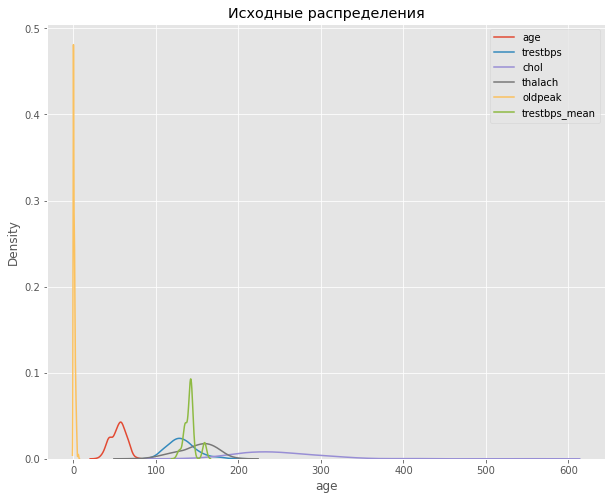

In [25]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')

sns.kdeplot(heart['age'], ax=ax1, label ='age')
sns.kdeplot(heart['trestbps'], ax=ax1, label ='trestbps')
sns.kdeplot(heart['chol'], ax=ax1, label ='chol')
sns.kdeplot(heart['thalach'], ax=ax1, label ='thalach')
sns.kdeplot(heart['oldpeak'], ax=ax1, label ='oldpeak')
sns.kdeplot(heart['trestbps_mean'], ax=ax1, label ='trestbps_mean')
plt.legend();

In [26]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   cp             303 non-null    int64  
 3   trestbps       303 non-null    int64  
 4   chol           303 non-null    int64  
 5   fbs            303 non-null    int64  
 6   restecg        303 non-null    int64  
 7   thalach        303 non-null    int64  
 8   exang          303 non-null    int64  
 9   oldpeak        303 non-null    float64
 10  slope          303 non-null    int64  
 11  ca             303 non-null    int64  
 12  thal           303 non-null    int64  
 13  target         303 non-null    int64  
 14  old            303 non-null    int64  
 15  trestbps_mean  303 non-null    int64  
 16  cp_1           303 non-null    int64  
 17  cp_2           303 non-null    int64  
 18  cp_3      

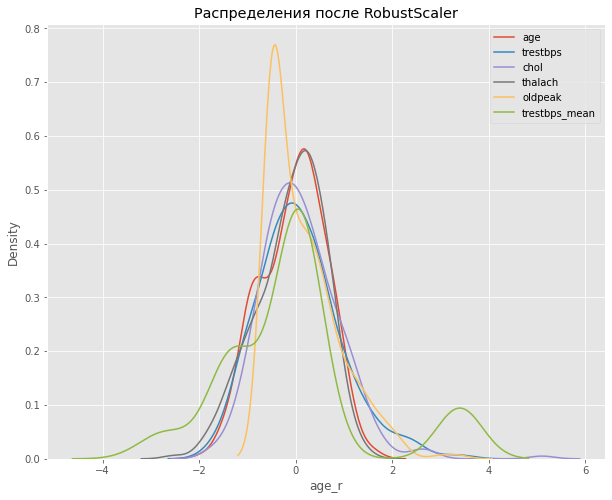

In [27]:
r_scaler = preprocessing.RobustScaler()

heart[['age_r', 'trestbps_r', 'chol_r', 'thalach_r', 'oldpeak_r', 'trestbps_mean_r']] = r_scaler.fit_transform(heart[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'trestbps_mean']])
    
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после RobustScaler')

sns.kdeplot(heart['age_r'], ax=ax1, label ='age')
sns.kdeplot(heart['trestbps_r'], ax=ax1, label ='trestbps')
sns.kdeplot(heart['chol_r'], ax=ax1, label ='chol')
sns.kdeplot(heart['thalach_r'], ax=ax1, label ='thalach')
sns.kdeplot(heart['oldpeak_r'], ax=ax1, label ='oldpeak')
sns.kdeplot(heart['trestbps_mean_r'], ax=ax1, label ='trestbps_mean')
plt.legend();

In [28]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              303 non-null    int64  
 1   sex              303 non-null    int64  
 2   cp               303 non-null    int64  
 3   trestbps         303 non-null    int64  
 4   chol             303 non-null    int64  
 5   fbs              303 non-null    int64  
 6   restecg          303 non-null    int64  
 7   thalach          303 non-null    int64  
 8   exang            303 non-null    int64  
 9   oldpeak          303 non-null    float64
 10  slope            303 non-null    int64  
 11  ca               303 non-null    int64  
 12  thal             303 non-null    int64  
 13  target           303 non-null    int64  
 14  old              303 non-null    int64  
 15  trestbps_mean    303 non-null    int64  
 16  cp_1             303 non-null    int64  
 17  cp_2            

In [29]:
# r_scaler = preprocessing.RobustScaler()

# heart['age_r'] = r_scaler.fit_transform(heart[['age']])
# heart['trestbps_r'] = r_scaler.fit_transform(heart[['trestbps']])
# heart['chol_r'] = r_scaler.fit_transform(heart[['chol']])
# heart['thalach_r'] = r_scaler.fit_transform(heart[['thalach']])
# heart['oldpeak_r'] = r_scaler.fit_transform(heart[['oldpeak']])
# heart['trestbps_mean_r'] = r_scaler.fit_transform(heart[['trestbps_mean']])

# fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
# ax1.set_title('Распределения после RobustScaler')

# sns.kdeplot(heart['age_r'], ax=ax1, label ='age')
# sns.kdeplot(heart['trestbps_r'], ax=ax1, label ='trestbps')
# sns.kdeplot(heart['chol_r'], ax=ax1, label ='chol')
# sns.kdeplot(heart['thalach_r'], ax=ax1, label ='thalach')
# sns.kdeplot(heart['oldpeak_r'], ax=ax1, label ='oldpeak')
# sns.kdeplot(heart['trestbps_mean_r'], ax=ax1, label ='trestbps_mean')
# plt.legend();

In [30]:
round(heart['chol_r'].std(), 6)

0.816232

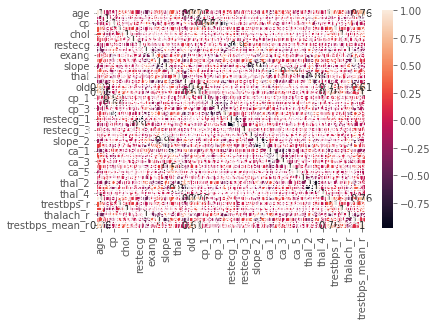

In [31]:
sns.heatmap(heart.corr(), annot=True);

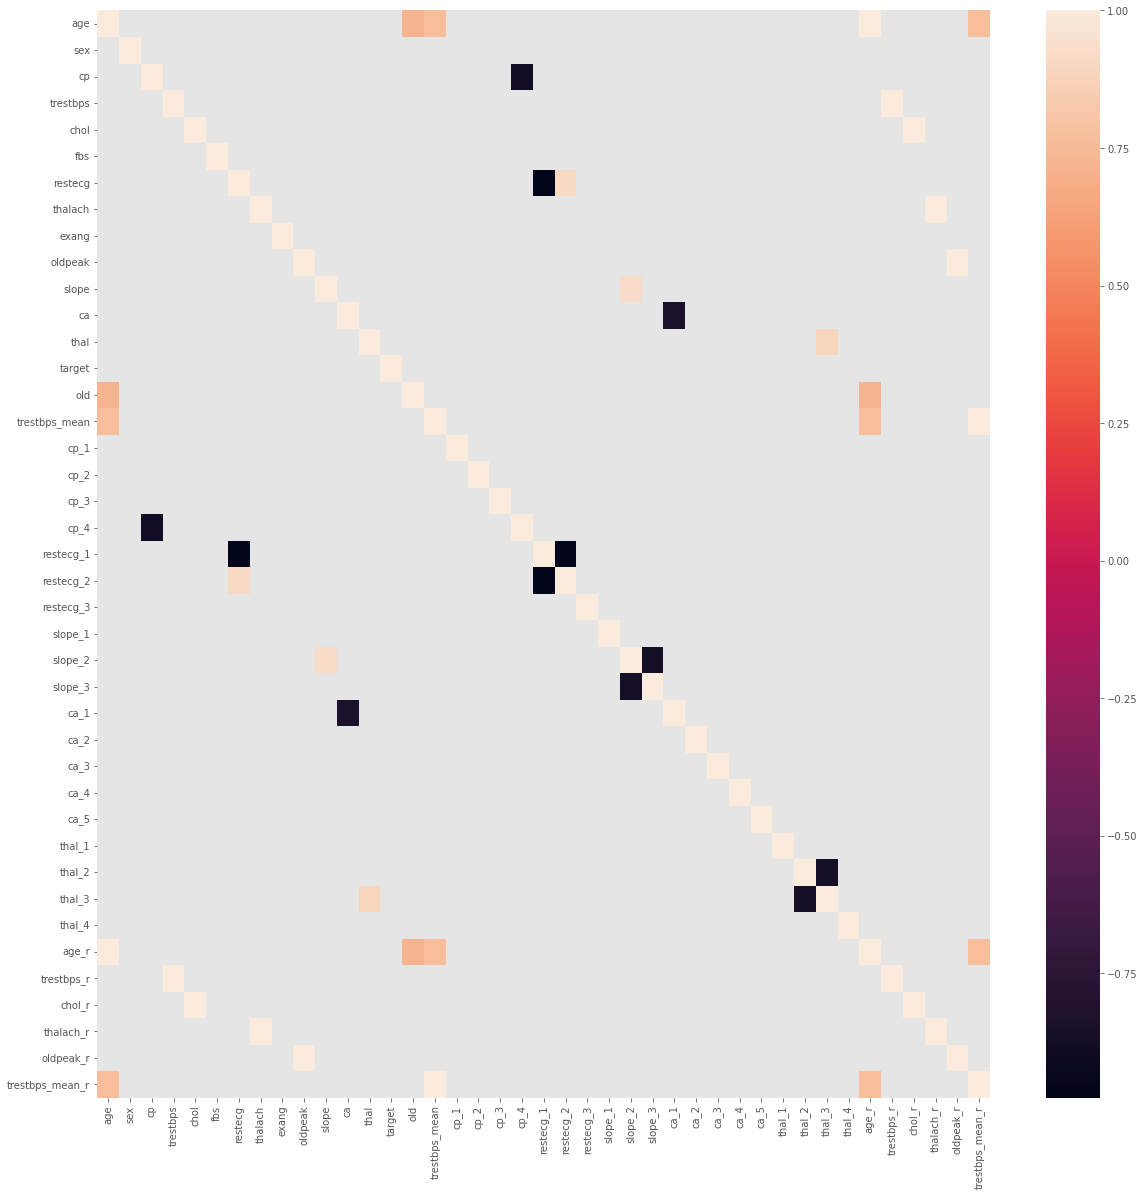

In [32]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(20, 20))

corr = heart.corr()
corr = corr[corr.abs() >= 0.65]
sns.heatmap(corr, ax=ax1);

In [33]:
data = pd.read_csv('data/wine_cleared.csv')

In [34]:
data['price_round'] = round(data['price'].astype(int))

In [35]:
regex = '\d{4}' # регулярное выражение для нахождения чисел
data['year'] = data['title'].str.findall(regex).str.get(0)

In [36]:
data['is_usa'] = data['country'].apply(lambda x: 1 if x == 'US' else 0)
data['is_italy'] = data['country'].apply(lambda x: 1 if x == 'Italy' else 0)
data['is_france'] = data['country'].apply(lambda x: 1 if x == 'France' else 0)

In [37]:
data['year'] = pd.to_datetime(data['year'], errors='coerce')
data['old_wine'] = data['year'].apply(lambda x: 1 if x.year < 2010 else 0)

In [38]:
regex = '\((.*?)\)' 
data['locality'] = data['title'].str.findall(regex).str.get(0)

In [39]:
country_population = pd.read_csv('data/country_population.csv', sep=';')
country_area = pd.read_csv('data/country_area.csv', sep=';')

data = data.join(country_population.set_index('country'), on='country')
data = data.join(country_area.set_index('country'), on='country')

In [40]:
data['years_diff'] = (pd.to_datetime('2022-01-12') - data['year']).dt.days

In [41]:
ord_encoder = ce.OrdinalEncoder(cols=['year'])
data['year_encoded'] = ord_encoder.fit_transform(data['year'])

In [42]:
encoder = ce.OneHotEncoder(cols=['taster_name']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(data['taster_name'])
data = pd.concat([data, type_bin], axis=1)

In [43]:
bin_encoder = ce.BinaryEncoder(cols=['country']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(data['country'])
data = pd.concat([data, type_bin], axis=1)

In [44]:
bin_encoder = ce.BinaryEncoder(cols=['taster_twitter_handle']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(data['taster_twitter_handle'])
data = pd.concat([data, type_bin], axis=1)

In [45]:
data['price_r'] = preprocessing.RobustScaler().fit_transform(data[['price']])

In [46]:
data['price_s'] = preprocessing.StandardScaler().fit_transform(data[['price']])

In [47]:
round(data['price_s'][129968], 2)

-0.14

In [48]:
data.head(2)

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,...,country_3,country_4,country_5,taster_twitter_handle_0,taster_twitter_handle_1,taster_twitter_handle_2,taster_twitter_handle_3,taster_twitter_handle_4,price_r,price_s
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),...,0,0,1,0,0,0,0,1,0.334700,0.000003
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),...,0,1,0,0,0,0,1,0,-0.590909,-0.514525


In [49]:
data['price_s'].sum()

-1.2008172234345693e-12